# Business Requirement

To identify possible CHURN-FLAG YES customers

- State 
- Account Length  
- Area Code  
- Phone  

- International Plan
- VMail Plan  
- VMail Message  

- Day Mins  
- Day Calls  
- Day Charge 

- Eve Mins 
- Eve Calls  
- Eve Charge 

- Night Mins 
- Night Calls
- Night Charge 

- International Mins 
- International calls 
- International Charge 

- CustServ Calls  
- Churn 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('telecom_churn_data.csv', header=None)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
0     4617 non-null object
1     4617 non-null int64
2     4617 non-null int64
3     4617 non-null object
4     4617 non-null object
5     4617 non-null object
6     4617 non-null int64
7     4617 non-null float64
8     4617 non-null int64
9     4617 non-null float64
10    4617 non-null float64
11    4617 non-null int64
12    4617 non-null float64
13    4617 non-null float64
14    4617 non-null int64
15    4617 non-null float64
16    4617 non-null float64
17    4617 non-null int64
18    4617 non-null float64
19    4617 non-null int64
20    4617 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 757.6+ KB


In [6]:
## no null values

# EDA

## Data Cleaning

- No null values
- Updaate the column names

#### Updating the column names

In [7]:
data.columns = ['State', 'Account Length', 'Area Code', 'Phone', 
                'International Plan', 'VMail Plan', 'VMail Message', 'Day Mins',
                'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
                'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
                'International Mins', 'International calls', 'International Charge', 'CustServ Calls', 'Churn'] 

In [9]:
data.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
State                   4617 non-null object
Account Length          4617 non-null int64
Area Code               4617 non-null int64
Phone                   4617 non-null object
International Plan      4617 non-null object
VMail Plan              4617 non-null object
VMail Message           4617 non-null int64
Day Mins                4617 non-null float64
Day Calls               4617 non-null int64
Day Charge              4617 non-null float64
Eve Mins                4617 non-null float64
Eve Calls               4617 non-null int64
Eve Charge              4617 non-null float64
Night Mins              4617 non-null float64
Night Calls             4617 non-null int64
Night Charge            4617 non-null float64
International Mins      4617 non-null float64
International calls     4617 non-null int64
International Charge    4617 non-null float64
CustServ Calls          4617 non-null

## Data Manipulation

- No data manipulation required

## Data Preprocessing

- Update the output variable to 0's and 1's
- Label Encode (International Plan, VMail Plan)

### Update the output variable to 0's and 1's

In [9]:
data['Churn'] = data['Churn'].apply(lambda x: 1 if x != ' False.' else 0)

In [10]:
data['Churn'].value_counts()

0    3960
1     656
Name: Churn, dtype: int64

In [11]:
data.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0


In [12]:
data.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
count,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000
mean,100.639298,437.051127,7.846187,180.428813,100.052210,30.673458,200.429744,100.180026,17.036759,200.614385,99.946057,9.027756,10.279354,4.434142,2.775942,1.567158,0.142114
std,39.599436,42.291548,13.591461,53.975003,19.884642,9.175693,50.562458,19.823454,4.297796,50.544926,19.936777,2.274547,2.757657,2.457790,0.744493,1.307134,0.349205
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.750000,408.000000,0.000000,143.700000,87.000000,24.430000,165.875000,87.000000,14.097500,167.100000,86.750000,7.520000,8.600000,3.000000,2.320000,1.000000,0.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.350000,4.000000,2.795000,1.000000,0.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.025000,114.000000,19.892500,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [13]:
data.corr()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
Account Length,1.000000,-0.020318,-0.013175,0.001768,0.032711,0.001765,-0.006770,0.015608,-0.006766,-0.002208,-0.009415,-0.002226,0.003498,0.023575,0.003517,0.002685,0.018108
Area Code,-0.020318,1.000000,-0.002455,-0.018729,-0.013123,-0.018731,0.011507,-0.011535,0.011527,0.002893,0.015267,0.002880,-0.007303,-0.011598,-0.007398,0.020999,0.011950
VMail Message,-0.013175,-0.002455,1.000000,0.008603,-0.003983,0.008600,0.017891,-0.006493,0.017898,0.004435,0.001012,0.004428,0.005195,0.007584,0.005231,-0.006834,-0.096792
Day Mins,0.001768,-0.018729,0.008603,1.000000,-0.002994,1.000000,-0.010243,0.013014,-0.010250,0.009311,0.005319,0.009298,-0.012283,0.000364,-0.012229,-0.008003,0.202635
Day Calls,0.032711,-0.013123,-0.003983,-0.002994,1.000000,-0.002992,-0.006424,0.003930,-0.006423,0.010636,-0.013251,0.010630,0.012962,0.010953,0.013066,-0.008701,0.016313
Day Charge,0.001765,-0.018731,0.008600,1.000000,-0.002992,1.000000,-0.010237,0.013015,-0.010245,0.009313,0.005318,0.009300,-0.012284,0.000361,-0.012231,-0.008010,0.202630
Eve Mins,-0.006770,0.011507,0.017891,-0.010243,-0.006424,-0.010237,1.000000,0.001135,1.000000,-0.018820,0.014221,-0.018827,0.000164,0.005742,0.000171,-0.015604,0.087039
Eve Calls,0.015608,-0.011535,-0.006493,0.013014,0.003930,0.013015,0.001135,1.000000,0.001150,0.002621,-0.015469,0.002636,-0.002799,0.005191,-0.002832,0.007724,0.001938
Eve Charge,-0.006766,0.011527,0.017898,-0.010250,-0.006423,-0.010245,1.000000,0.001150,1.000000,-0.018829,0.014225,-0.018836,0.000161,0.005744,0.000169,-0.015617,0.087032
Night Mins,-0.002208,0.002893,0.004435,0.009311,0.010636,0.009313,-0.018820,0.002621,-0.018829,1.000000,0.025830,0.999999,-0.004530,-0.014543,-0.004481,-0.013791,0.043344


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
data['International Plan'] = LabelEncoder().fit_transform(data['International Plan'])
data['VMail Plan'] = LabelEncoder().fit_transform(data['VMail Plan'])

In [16]:
data.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,AL,118,510,391-8027,1,0,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0


In [17]:
data.describe()

,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
count,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000
mean,100.639298,437.051127,0.096620,0.267548,7.846187,180.428813,100.052210,30.673458,200.429744,100.180026,17.036759,200.614385,99.946057,9.027756,10.279354,4.434142,2.775942,1.567158,0.142114
std,39.599436,42.291548,0.295472,0.442728,13.591461,53.975003,19.884642,9.175693,50.562458,19.823454,4.297796,50.544926,19.936777,2.274547,2.757657,2.457790,0.744493,1.307134,0.349205
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.750000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,165.875000,87.000000,14.097500,167.100000,86.750000,7.520000,8.600000,3.000000,2.320000,1.000000,0.000000
50%,100.000000,415.000000,0.000000,0.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.350000,4.000000,2.795000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,17.000000,216.800000,113.000000,36.860000,234.025000,114.000000,19.892500,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


## Data Visualization

- State 
- Account Length
- Area Code - 3 codes - 408, 415, 510
- Phone 
- International Plan - When 0 then churn mostly 0
- VMail Plan - When  1 less likely to be churn 1
- VMail Message - When Vmail Plan is 0 then Vmail MEssage is 0 When Vmail Plan is 1 then Vmail MEssage is some constant
- Day Mins, Calls, Charge
- Eve Mins, Calls, Charge
- Night Mins, Calls, Charge
- International Mins, Calls, Charge
- CustServ Calls - 10 types
- Churn - Output

In [18]:
## State

In [19]:
data['State'].value_counts()

WV    149
AL    114
MN    112
OH    110
ID    110
NY    109
VA    109
OR    107
NJ    106
WY    106
TX    105
UT    104
WI     99
MI     98
MA     97
KS     95
VT     95
ME     95
CT     92
MD     92
MT     92
MS     91
NH     91
CO     91
RI     90
KY     90
WA     89
NV     89
IN     89
DE     89
FL     85
NM     84
MO     84
SC     83
NC     83
TN     83
DC     82
AZ     81
OK     80
ND     80
IL     79
NE     79
HI     79
GA     77
AR     77
SD     76
LA     73
AK     69
PA     68
IA     65
CA     44
Name: State, dtype: int64

In [20]:
## check outliers

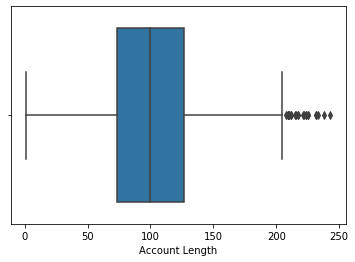

In [21]:
sns.boxplot(data['Account Length'])  # there are few outliers

In [22]:
data[data['Account Length'] > 200]['Account Length'].count()

32

In [23]:
data['Churn'].value_counts()

0    3960
1     656
Name: Churn, dtype: int64

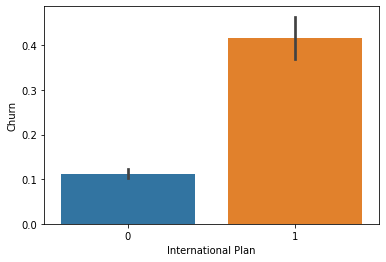

In [24]:
sns.barplot('International Plan','Churn',data = data)

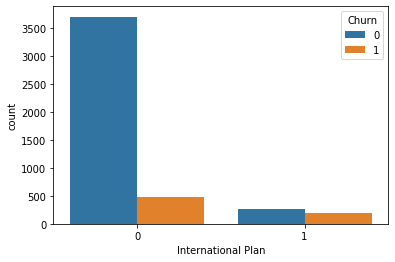

In [25]:
sns.countplot(x='International Plan',hue='Churn',data=data)

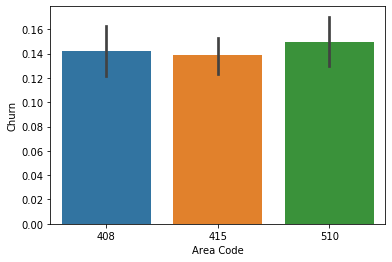

In [26]:
sns.barplot('Area Code','Churn',data = data)  ## area codes are not much dependent on Chrun

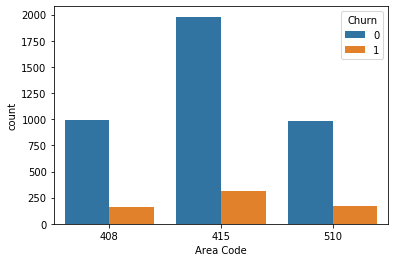

In [27]:
sns.countplot(x='Area Code',hue='Churn',data=data)

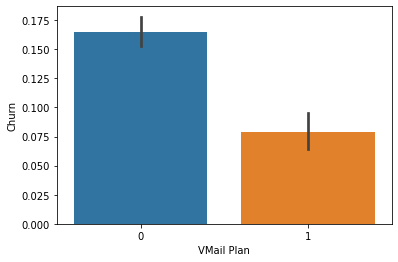

In [28]:
sns.barplot('VMail Plan','Churn', data= data) ## People with No Vmail are more likely to stay

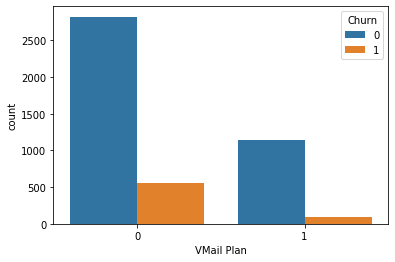

In [29]:
sns.countplot(x='VMail Plan',hue='Churn',data=data)

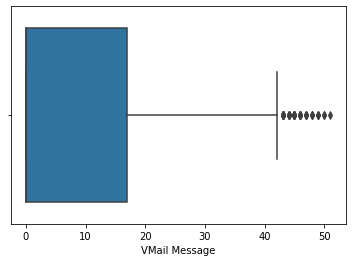

In [30]:
sns.boxplot(data['VMail Message'])  ## there are few outliers

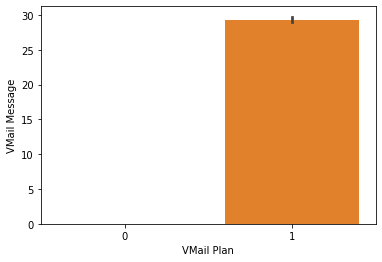

In [31]:
sns.barplot('VMail Plan', 'VMail Message', data= data)

In [32]:
## No Vmail Plan then no Vmail message, so we remove Vmail message because no VmailPlan then VmailMessage is 0 else some value

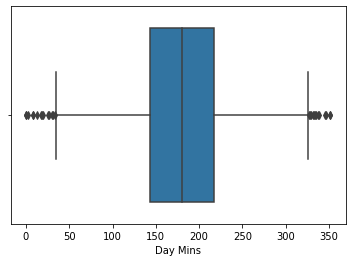

In [33]:
sns.boxplot(data['Day Mins'])

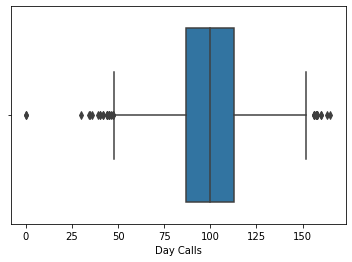

In [34]:
sns.boxplot(data['Day Calls'])

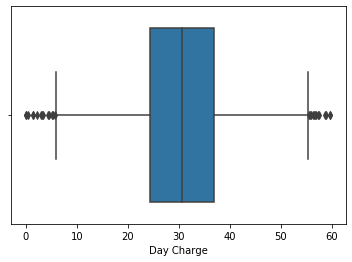

In [35]:
sns.boxplot(data['Day Charge'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24707198b38>,
 'caps': [<matplotlib.lines.Line2D at 0x24707198f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x24707198710>],
 'medians': [<matplotlib.lines.Line2D at 0x247071a6898>],
 'fliers': [<matplotlib.lines.Line2D at 0x247071a6be0>],
 'means': []}

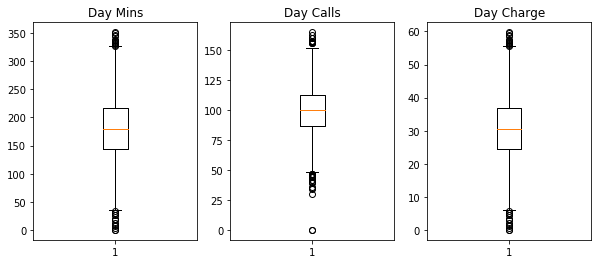

In [36]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))
ax1.set_title('Day Mins')
ax1.boxplot(data['Day Mins'])
ax2.set_title('Day Calls')
ax2.boxplot(data['Day Calls'])
ax3.set_title('Day Charge')
ax3.boxplot(data['Day Charge'])

{'whiskers': [<matplotlib.lines.Line2D at 0x247072ca3c8>,
 'caps': [<matplotlib.lines.Line2D at 0x247072caa58>,
 'boxes': [<matplotlib.lines.Line2D at 0x247072bdcf8>],
 'medians': [<matplotlib.lines.Line2D at 0x247072cae48>],
 'fliers': [<matplotlib.lines.Line2D at 0x247072d7470>],
 'means': []}

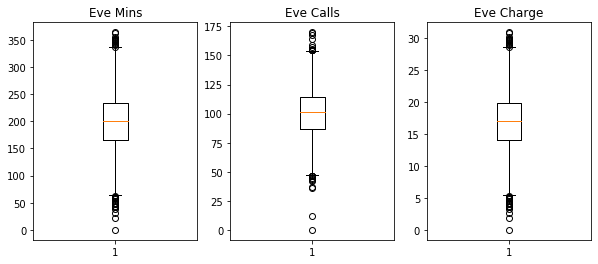

In [37]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))
ax1.set_title('Eve Mins')
ax1.boxplot(data['Eve Mins'])
ax2.set_title('Eve Calls')
ax2.boxplot(data['Eve Calls'])
ax3.set_title('Eve Charge')
ax3.boxplot(data['Eve Charge'])

{'whiskers': [<matplotlib.lines.Line2D at 0x247073eae48>,
 'caps': [<matplotlib.lines.Line2D at 0x247073f77b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x247073eaa58>],
 'medians': [<matplotlib.lines.Line2D at 0x247073f7e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x247073f7ef0>],
 'means': []}

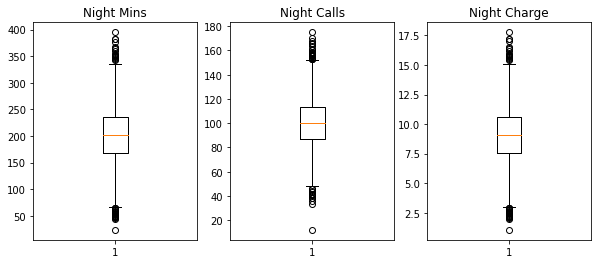

In [38]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))
ax1.set_title('Night Mins')
ax1.boxplot(data['Night Mins'])
ax2.set_title('Night Calls')
ax2.boxplot(data['Night Calls'])
ax3.set_title('Night Charge')
ax3.boxplot(data['Night Charge'])

{'whiskers': [<matplotlib.lines.Line2D at 0x247084e43c8>,
 'caps': [<matplotlib.lines.Line2D at 0x247084e4a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x247084d6cf8>],
 'medians': [<matplotlib.lines.Line2D at 0x247084e4e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x247084ef470>],
 'means': []}

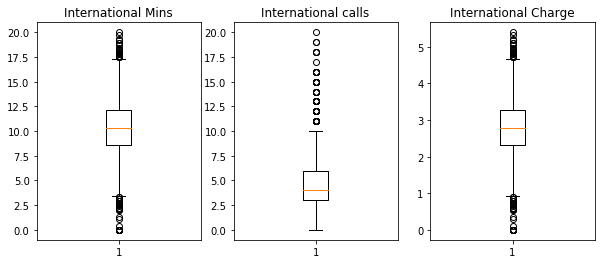

In [39]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))
ax1.set_title('International Mins')
ax1.boxplot(data['International Mins'])
ax2.set_title('International calls')
ax2.boxplot(data['International calls'])
ax3.set_title('International Charge')
ax3.boxplot(data['International Charge'])

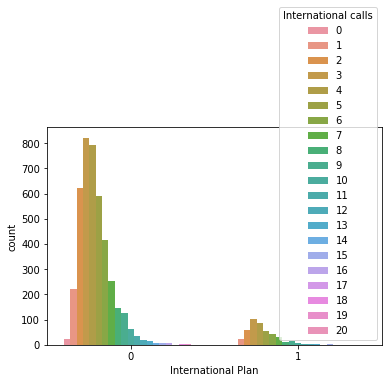

In [40]:
sns.countplot(x='International Plan',hue='International calls',data=data)

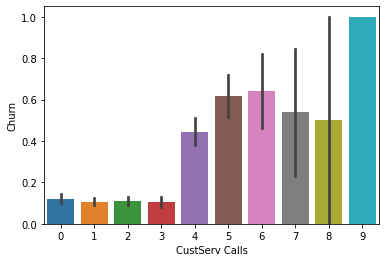

In [41]:
sns.barplot('CustServ Calls','Churn',data = data)

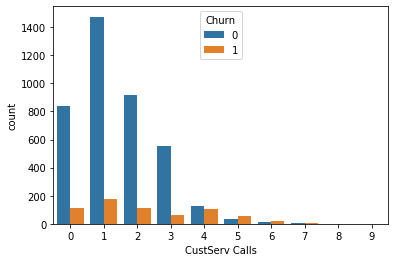

In [42]:
sns.countplot(x='CustServ Calls',hue='Churn',data=data)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4616 entries, 0 to 4615
Data columns (total 21 columns):
State                   4616 non-null object
Account Length          4616 non-null int64
Area Code               4616 non-null int64
Phone                   4616 non-null object
International Plan      4616 non-null int32
VMail Plan              4616 non-null int32
VMail Message           4616 non-null int64
Day Mins                4616 non-null float64
Day Calls               4616 non-null int64
Day Charge              4616 non-null float64
Eve Mins                4616 non-null float64
Eve Calls               4616 non-null int64
Eve Charge              4616 non-null float64
Night Mins              4616 non-null float64
Night Calls             4616 non-null int64
Night Charge            4616 non-null float64
International Mins      4616 non-null float64
International calls     4616 non-null int64
International Charge    4616 non-null float64
CustServ Calls          4616 non-null i

# Feature Selection

-  Drop state, Phone and Vmail Plan

In [44]:
data.drop('State', axis=1, inplace = True)
data.drop('Phone', axis=1, inplace = True)
data.drop('VMail Plan', axis=1, inplace = True)

In [45]:
data.head()

,Account Length,Area Code,International Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,107,415,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,137,415,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,84,408,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,75,415,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,118,510,1,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0


In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
X = data.drop('Churn', axis=1).copy()
y = data['Churn'].copy()

## Model Selection

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

In [49]:
clf_models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), 
              ExtraTreesClassifier(), GradientBoostingClassifier(), SVC(),
              KNeighborsClassifier(), MultinomialNB()]

In [50]:
def find_clf(clfs, x, y, k):
    means, stds = [], []
    for clf in clfs:
        try:
            acc = cross_val_score(clf, x, y, cv = k, n_jobs=-1)
            means.append(acc.mean())
            stds.append(acc.std())
            print(clf.__class__.__name__, ': mean = ', acc.mean(), ', std = ', acc.std())
        except:
            means.append(0)
            stds.append(0)
            print(clf.__class__.__name__, ': Not Applicable')
    return means, stds

In [51]:
find_clf(clf_models, X, y, 5)

LogisticRegression : mean =  0.8626502605375845 , std =  0.004996280969986337
DecisionTreeClassifier : mean =  0.9144297017536454 , std =  0.0076410773228365375
RandomForestClassifier : mean =  0.9419397503904546 , std =  0.0035533644519041107
ExtraTreesClassifier : mean =  0.9252590132871823 , std =  0.0028486719682985877
GradientBoostingClassifier : mean =  0.9503888130648693 , std =  0.0037288522692285205
SVC : mean =  0.8578857761956353 , std =  0.0003714595263891063
KNeighborsClassifier : mean =  0.8775996304165318 , std =  0.005934392216461703
MultinomialNB : mean =  0.643203041090365 , std =  0.020160325768470128


([0.8626502605375845,
  0.9144297017536454,
  0.9419397503904546,
  0.9252590132871823,
  0.9503888130648693,
  0.8578857761956353,
  0.8775996304165318,
  0.643203041090365],
 [0.004996280969986337,
  0.0076410773228365375,
  0.0035533644519041107,
  0.0028486719682985877,
  0.0037288522692285205,
  0.0003714595263891063,
  0.005934392216461703,
  0.020160325768470128])

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
X_scaled = StandardScaler().fit_transform(X)

In [54]:
find_clf(clf_models, X_scaled, y, 5)

LogisticRegression : mean =  0.8630838644923152 , std =  0.006058960765647307
DecisionTreeClassifier : mean =  0.9133455746131803 , std =  0.009288011846430713
RandomForestClassifier : mean =  0.9441075356568314 , std =  0.007461596149110269
ExtraTreesClassifier : mean =  0.9267765098751015 , std =  0.005244161099787018
GradientBoostingClassifier : mean =  0.9503888130648693 , std =  0.0037288522692285205
SVC : mean =  0.9224435189223922 , std =  0.0037934351429457142
KNeighborsClassifier : mean =  0.8892987294395744 , std =  0.005442496715353831
MultinomialNB : Not Applicable


([0.8630838644923152,
  0.9133455746131803,
  0.9441075356568314,
  0.9267765098751015,
  0.9503888130648693,
  0.9224435189223922,
  0.8892987294395744,
  0],
 [0.006058960765647307,
  0.009288011846430713,
  0.007461596149110269,
  0.005244161099787018,
  0.0037288522692285205,
  0.0037934351429457142,
  0.005442496715353831,
  0])

## Hyper parameter tuning

In [55]:
from sklearn.model_selection import GridSearchCV

### DecisionTreeClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, SVC

In [56]:
## Random Forest 

In [59]:
rf_params = {'max_features':[1, 3, 6, 9],
             'min_samples_split':[2, 6, 10],
             'min_samples_leaf':[1, 3, 6, 9],
             'n_estimators': [100, 300, 500]}

In [60]:
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, n_jobs=-1)
rf_grid.fit(X_scaled, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [61]:
et_params = {'min_samples_split':[2, 6, 10],
             'min_samples_leaf':[1, 3, 6, 9],
             'n_estimators': [100, 300, 500]}

In [62]:
et_grid = GridSearchCV(ExtraTreesClassifier(), et_params, n_jobs=-1)
et_grid.fit(X_scaled, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                            criterion='gini', max_depth=None,
                                            max_features='auto',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators='warn', n_jobs=None,
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'min_samples_leaf':

In [63]:
dt_params = {'max_features':[1, 3, 6, 9],
             'min_samples_split':[2, 6, 10],
             'min_samples_leaf':[1, 3, 6, 9]}

In [64]:
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, n_jobs=-1)
dt_grid.fit(X_scaled, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_features': [1, 3, 6, 9],
                         'min_samples_leaf': [1, 3, 6, 9],
                   

In [65]:
gt_params = {'learning_rate':[0.001,0.05,0.1],
             'min_samples_split':[2, 6, 10],
             'min_samples_leaf':[1, 3, 6, 9],
             'n_estimators': [100, 300, 500],
             'max_depth':[4,8]}

In [66]:
gt_grid = GridSearchCV(GradientBoostingClassifier(), gt_params, n_jobs=-1)
gt_grid.fit(X_scaled, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_it...
                                                  random_state=None,

In [67]:
svc_params = {'kernel':['linear', 'rbf'],
              'C':[0.1,1,10],
              'gamma':[0.001,0.01,0.1,1]}


In [68]:
svc_grid = GridSearchCV(SVC(), svc_params, n_jobs=-1)
svc_grid.fit(X_scaled, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

## Best Features

In [70]:
rf_grid.best_score_

0.9564558058925476

In [71]:
et_grid.best_score_

0.942157712305026

In [72]:
gt_grid.best_score_

0.9584055459272097

In [73]:
dt_grid.best_score_

0.9395580589254766

In [74]:
svc_grid.best_score_

0.9168110918544194

In [75]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
gt_grid.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=6, min_samples_split=6,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [77]:
et_grid.best_estimator_

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=6,
                     min_weight_fraction_leaf=0.0, n_estimators=300,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [78]:
dt_grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [79]:
svc_grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Ensembling

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [82]:
rf = rf_grid.best_estimator_
et = et_grid.best_estimator_
gt = gt_grid.best_estimator_
dt = dt_grid.best_estimator_

In [84]:
prediction = pd.DataFrame(np.zeros((len(y_test), 4)), columns = 'rf et gt dt'.split())

In [85]:
rf.fit(X_train, y_train)
prediction['rf'] = rf.predict(X_test)
et.fit(X_train, y_train)
prediction['et'] = et.predict(X_test)
gt.fit(X_train, y_train)
prediction['gt'] = gt.predict(X_test)
dt.fit(X_train, y_train)
prediction['dt'] = dt.predict(X_test)

In [86]:
prediction.corr()

,rf,et,gt,dt
rf,1.000000,0.852389,0.910117,0.778136
et,0.852389,1.000000,0.806689,0.688094
gt,0.910117,0.806689,1.000000,0.745732
dt,0.778136,0.688094,0.745732,1.000000


In [87]:
from sklearn.ensemble import VotingClassifier

In [88]:
vc = VotingClassifier(estimators=[('rf', rf_grid.best_estimator_), 
                             ('et', et_grid.best_estimator_), 
                             ('gt', gt_grid.best_estimator_),
                             ('dt', dt_grid.best_estimator_)], voting='soft')

In [89]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=6,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=3,
                                                     min_samples_split=6,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=None,
               

In [90]:
y_pred = vc.predict(X_test)

In [91]:
from sklearn.metrics import confusion_matrix, classification_report 

In [92]:
print(confusion_matrix(y_test, y_pred))

[[779   7]
 [ 43  95]]


In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       786
           1       0.93      0.69      0.79       138

    accuracy                           0.95       924
   macro avg       0.94      0.84      0.88       924
weighted avg       0.95      0.95      0.94       924



In [94]:
acc = cross_val_score(vc, X_scaled, y, cv=3)
print(acc.mean())
print(acc.std())

0.9534225439821681
0.003615693835608913


## Conclusion

- We are able to predict the chrun flag using the gradient boosting algorithm with 95% accuracy
- By predicting churn flag we can provide more attention in customer.